# Datasets

In [1]:
import pandas as pd
import os
def load_data(path):
    df = pd.read_excel(path, index_col='交易时间')
    df.dropna(inplace=True)
    return df

In [2]:
import numpy as np
path = 'datasets/'
list_df = pd.read_excel(os.path.join(path, '指数数据表.xlsx'), dtype={'指数编码':np.str_}, index_col='指数编码')
list_df.index = list_df.index.astype(np.str_)

In [3]:
list_dict = list_df['指数名称'].to_dict()
list_dict

{'S&P500': '标普500',
 'MXX': '墨西哥BOLSA',
 'TSX': '加拿大多伦多S&P/TSX 综合指数',
 'IBOV': '巴西IBOVESPA',
 'WICOLL': 'FTSE Colombia',
 'IPSA': 'S&P CLX IPSA',
 'IACR': 'Costa Rica Indice Accionario',
 'FTSE100': '英国富时100',
 'CAC40': '法国CAC40',
 'DAX': '德国DAX',
 'IBEX35': '西班牙IBEX35',
 'AEX': '荷兰AEX',
 'SMI': '瑞士SMI',
 'BFX': '比利时BFX',
 'HSI': '恒生指数',
 'STI30': '富时新加坡海峡时报',
 'N225': '日经225',
 'KS11': '韩国综合指数',
 'ASX200': '澳大利亚标普200指数',
 'BSESN30': '孟买Sensex30',
 'SSEC': '上证指数'}

In [25]:
ret_origin_df=pd.DataFrame()
path = 'datasets/指数日线数据/'
for i in os.listdir(path):
    code = i.split('.xls')[0].split('K线导出_')[-1].split('_日线数据')[0]
    print(code)
    if code in list_dict:
        ret_origin_df[list_dict[code]] = load_data(os.path.join(path, i))['收盘价']

SZ
RTS
ATX
DJIA
SPX
TWII
HSI
HS300
399001
STI
KS11
AEX
GDAXI
MIB
FCHI
IBEX
FTSE
BFX
AS51
IXIC
.ipynb_checkpoints
MXX
SENSEX
N225
SSMI


In [13]:
ret_origin_df.head()

,恒生指数,韩国综合指数,荷兰AEX,比利时BFX,墨西哥BOLSA,日经225
交易时间,,,,,,
2000-01-03,17369.63,NaN,675.44,3311.05,7077.71,NaN
2000-01-04,17072.82,1059.04,642.25,3172.21,6675.27,19002.86
2000-01-05,15846.71,986.31,632.31,3057.53,6764.31,18542.55
2000-01-06,15153.23,960.79,624.21,3061.09,6751.65,18168.27
2000-01-07,15405.62,948.65,644.86,3138.55,7047.09,18193.41


## Clean Data

In [15]:
ret_cleaned_df = ret_origin_df.fillna(method="ffill").dropna()

/var/folders/sv/xyzb31jx2zz1ns_qr3d7hy700000gn/T/ipykernel_12160/4229536174.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret_cleaned_df = ret_origin_df.fillna(method="ffill").dropna()


In [16]:
ret_cleaned_df.head()

,恒生指数,韩国综合指数,荷兰AEX,比利时BFX,墨西哥BOLSA,日经225
交易时间,,,,,,
2000-01-04,17072.82,1059.04,642.25,3172.21,6675.27,19002.86
2000-01-05,15846.71,986.31,632.31,3057.53,6764.31,18542.55
2000-01-06,15153.23,960.79,624.21,3061.09,6751.65,18168.27
2000-01-07,15405.62,948.65,644.86,3138.55,7047.09,18193.41
2000-01-10,15848.15,987.24,655.14,3203.75,7333.70,18193.41


## Calculate Log-Return

In [17]:
ret_log_df = (ret_cleaned_df/ret_cleaned_df.shift(1)).apply(np.log)
ret_log_df = ret_log_df.dropna()
ret_log_df.index.name='Date'
ret_log_df.head()


,恒生指数,韩国综合指数,荷兰AEX,比利时BFX,墨西哥BOLSA,日经225
Date,,,,,,
2000-01-05,-0.074526,-0.071147,-0.015598,-0.036821,0.013251,-0.024521
2000-01-06,-0.044748,-0.026215,-0.012893,0.001164,-0.001873,-0.020391
2000-01-07,0.016519,-0.012716,0.032546,0.024990,0.042828,0.001383
2000-01-10,0.028320,0.039873,0.015816,0.020561,0.039865,0.000000
2000-01-11,0.000879,-0.006004,-0.009509,-0.017269,-0.026329,0.035502


<Axes: xlabel='Date'>

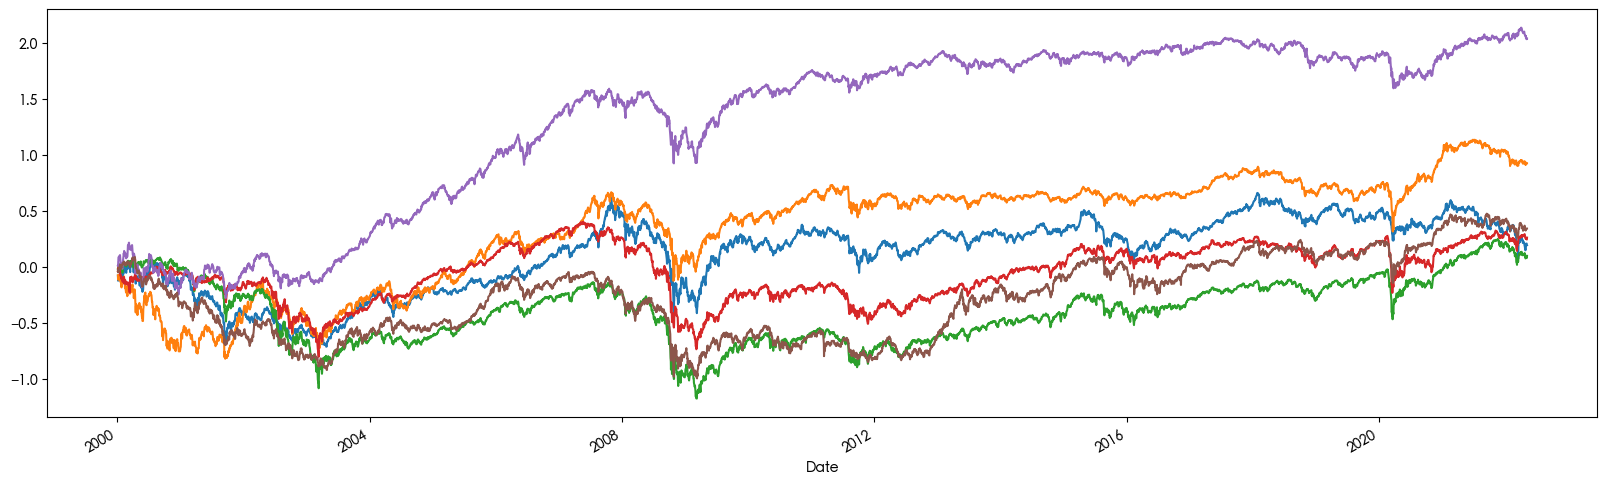

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
ret_log_df.cumsum().plot(figsize=(20, 6), legend=False)
#plt.savefig('ret_log_plot.png', dpi=300)

## Correlationship Matrix

### Global

<Axes: >

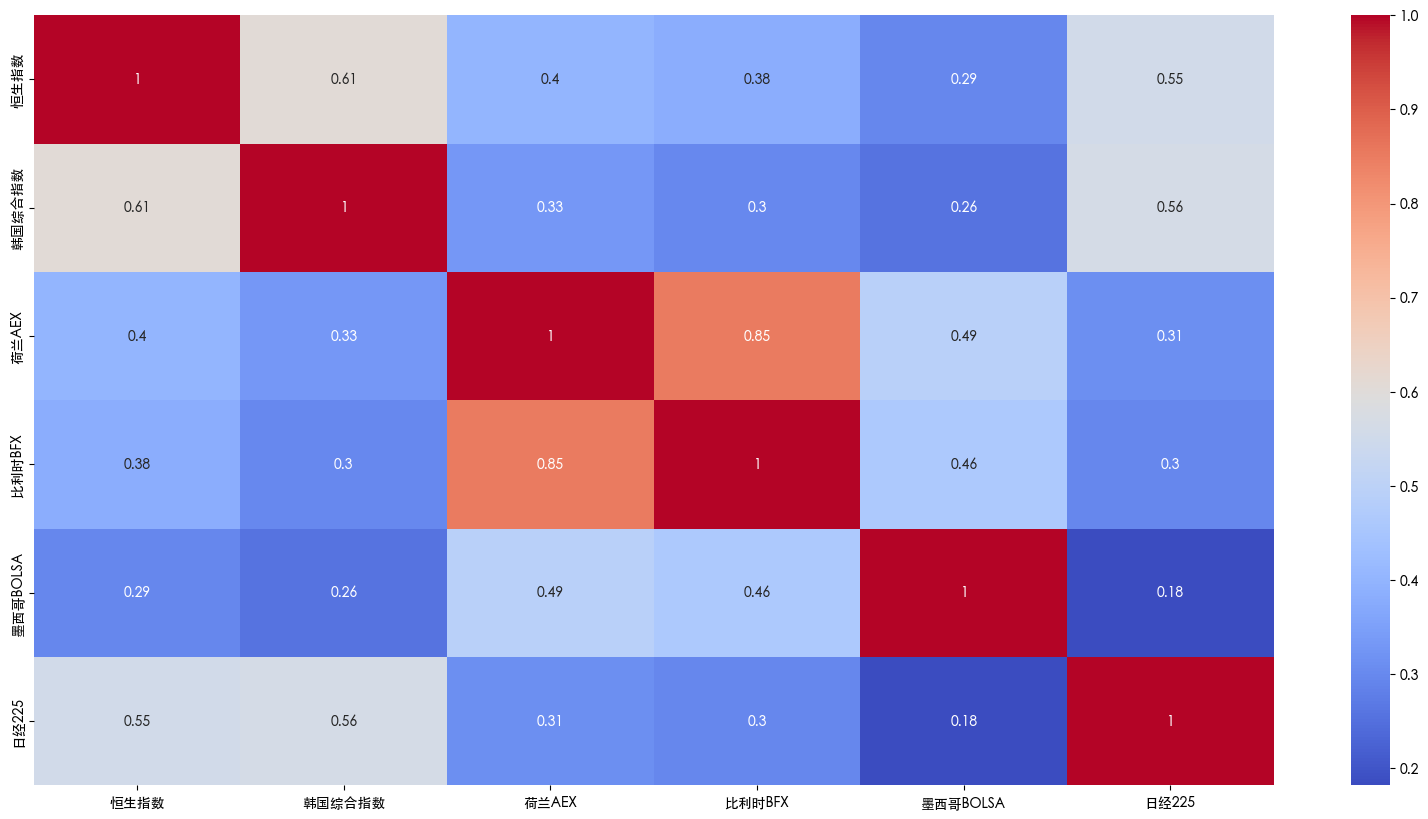

In [24]:
# correlation using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(ret_log_df.corr(), annot = True, cmap='coolwarm')

In [14]:
plt.rcParams["font.sans-serif"]=["Heiti TC"] #设置字体
plt.figure()
g = sns.clustermap(ret_log_df[['俄罗斯RTS', '奥地利ATX', '道琼斯工业平均', '标普500', '台湾加权', '恒生指数',
       '富时新加坡海峡时报', '韩国综合指数', '荷兰AEX', '德国DAX', '富时意大利MIB', '法国CAC40',
       '西班牙IBEX35', '英国富时100', '比利时BFX', '上证指数', '澳大利亚标普200指数', '纳斯达克',
       '墨西哥MXX', '孟买Sensex30', '日经225', '瑞士SMI']].iloc[-600:].corr(), cmap='coolwarm')
g.ax_row_dendrogram.remove()
#g.savefig('heat_map.jpg')

NameError: name 'sns' is not defined

<Figure size 640x480 with 0 Axes>

### Rolling

In [14]:
from tqdm import tqdm
def cal_rolling_corr(ret_df, min_periods):
    """
    df: pd.DataFrame, 行标题日期
    """
    _corr_ret_list = []
    _corr_ret_df = pd.DataFrame()
    for i in tqdm(range(ret_df.shape[0])):
        if i<min_periods: 
            _corr_ret_list.append(np.nan)
            _corr_ret_df[ret_df.index[i]] = np.nan * ret_df.iloc[i]
        else:
            _ret_rolling_df = ret_df.iloc[i-min_periods:i, :]
            _corr = (_ret_rolling_df.corr().sum()-1)/_ret_rolling_df.shape[1]
            _corr_ret_list.append(_corr.mean())
            _corr_ret_df[ret_df.index[i]]=_corr
    rolling_corr_ts = pd.Series(_corr_ret_list, index=ret_df.index)
    rolling_corr_df = _corr_ret_df.T
    return rolling_corr_ts, rolling_corr_df

In [15]:
rolling_corr_ts, rolling_corr_df= cal_rolling_corr(ret_log_df[['俄罗斯RTS', '奥地利ATX', '道琼斯工业平均', '标普500', '台湾加权', '恒生指数', 
       '富时新加坡海峡时报', '韩国综合指数', '荷兰AEX', '德国DAX', '富时意大利MIB', '法国CAC40',
       '西班牙IBEX35', '英国富时100', '比利时BFX',  '澳大利亚标普200指数', '纳斯达克',
       '墨西哥MXX', '孟买Sensex30', '日经225', '瑞士SMI']], min_periods=300)
# rolling_corr_ts, rolling_corr_df= cal_rolling_corr(ret_log_df, min_periods=60)

 71%|███████   | 2969/4209 [00:04<00:01, 730.14it/s]


KeyboardInterrupt: 

In [ ]:
rolling_corr_ts.plot(figsize=(20,6), legend=False)

### Adjacent Matrix

In [ ]:
tmp = ret_log_df.corr().abs()
corr_threshold_val = 0.3
tmp[tmp<corr_threshold_val]=np.nan
D = (2*(1-tmp)).apply(np.sqrt)
#D = D.fillna(0)
adjacent_matrix_df = (-D).apply(np.exp)
adjacent_matrix_df = adjacent_matrix_df - np.identity(adjacent_matrix_df.shape[1])
adjacent_matrix_df = adjacent_matrix_df.fillna(0)
adjacent_matrix_df

## Degree Timeseries
这里需要注意，以下代码求的k是绝对度，并没有对度进行每个时刻求比例。

In [ ]:
from tqdm.notebook import tqdm
def cal_distance(ret, corr_threshold_val=0.):
    tmp = ret.corr().abs()
    #tmp[tmp<corr_threshold_val]=np.nan
    D = (2*(1-tmp)).apply(np.sqrt)
    return D

def cal_k(ret, min_periods=200):
    """
    df: pd.DataFrame, 行标题日期
    """
    k_df = pd.DataFrame()
    for i in tqdm(range(ret.shape[0])):
        if i<min_periods: 
            k_df[ret.index[i]]=ret.iloc[i]*np.nan
        else:
            rolling_ret = ret.iloc[i-min_periods:i, :]
            D = cal_distance(rolling_ret)
            adjacent_matrix_df=(-D).apply(np.exp)
            adjacent_matrix_df = adjacent_matrix_df - np.identity(adjacent_matrix_df.shape[1])
            adjacent_matrix_df = adjacent_matrix_df.fillna(0)
            k_df[ret.index[i]] = adjacent_matrix_df.sum()
    return k_df.T

In [ ]:
k_df = cal_k(ret_log_df, 200)

In [ ]:
k_df.plot(figsize=(20,10))

In [ ]:
delta_k_df = k_df - k_df.shift(1)
delta_k_df.plot(figsize=(10,6))

## TemporalNetwork

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA, ARIMA
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")


class TemporalNetwork():
    """
    对金融复杂网络进行时序建模
    1. 构建金融时间序列的复杂网络
    2. 应用AR、ARMA进行时序的层间链路建模
    3. 
    """
    def __init__(self, log_ret_df):
        """
        ret_df: 对数收益率面板数据，行为日期，列为标的，每一列为一条时间序列。
        """
        self.log_ret_df = log_ret_df
        self.network_nodes = log_ret_df.columns
        self.network_timeseries = log_ret_df.index
        self.p_dict = {}
   
    # ------------------------------------------------------------
    def rolling(self, rolling_windows=200, AR_windows=10):
        """
        主函数，在负责滚动窗口时，完成各个计算
        df: pd.DataFrame, 行标题日期
        """
        for i in tqdm(range(self.log_ret_df.shape[0])):
            if i<rolling_windows: 
                continue
            else:
                self.sliding_log_ret_df = self.sliding(self.log_ret_df, i, rolling_windows)
                self.distance_matrix_df = self.cal_distance_matrix(self.sliding_log_ret_df)
                self.adjacent_matrix_df = self.cal_adjacent_matrix(self.distance_matrix_df)
                self.k_df = self.cal_k(self.adjacent_matrix_df)
                
                if i >= 2 * rolling_windows + AR_windows:
                    model = self.cal_p(self.k_df)
                    return model
                    #self.w_matrix_df = self.cal_w_matrix(self.k_df, p, q)
                    #break
                    #self.cal_tsn_matrix(self.adjacent_matrix_df, self.w_matrix_df)
                    #if i >= 6*rolling_windows: return

    # ------------------------------------------------------------
    def sliding(self, df, i, sliding_windows):
        """
        对面板数据df的第i-periods到i行进行切片
        periods: 切片窗口大小
        """
        return df.iloc[i-sliding_windows:i, :]
    
    # ------------------------------------------------------------
    def cal_distance_matrix(self, log_ret_df):
        """
        计算距离矩阵，根据收益率面板数据df，基于相关系数
        log_ret_df：对数收益率面板
        """
        corr = log_ret_df.corr()
        distance_matrix_df = (2*(1-corr)).apply(np.sqrt)
        distance_matrix_df.date = log_ret_df.index.values[-1]
        return distance_matrix_df
    
    # ------------------------------------------------------------
    def cal_adjacent_matrix(self, distance_df):
        """
        计算邻接矩阵
        distance_df: 距离矩阵
        """
        adjacent_matrix_df=(-distance_df).apply(np.exp)
        adjacent_matrix_df = adjacent_matrix_df - np.identity(adjacent_matrix_df.shape[1])
        adjacent_matrix_df = adjacent_matrix_df.fillna(0)
        adjacent_matrix_df.date = distance_df.date
        try:
            self.adjacent_matrix_dict[str(adjacent_matrix_df.date)[:10]] = adjacent_matrix_df
        except:
            self.adjacent_matrix_dict = {}
            self.adjacent_matrix_dict[str(adjacent_matrix_df.date)[:10]] = adjacent_matrix_df
        return adjacent_matrix_df
    
    # ------------------------------------------------------------
    def cal_k(self, adjacent_matrix_df):
        """
        计算各个节点的度，根据邻接矩阵
        adjacent_matrix_df：邻接矩阵
        """
        k = adjacent_matrix_df.sum()
        k.date = adjacent_matrix_df.date
        try:
            tmp = self.k_df.T
            tmp[k.date] = k
            self.k_df = tmp.T
        except:
            self.k_df = pd.DataFrame()
            self.k_df[k.date] = k
            self.k_df = self.k_df.T
        return self.k_df
    
    # ------------------------------------------------------------   
    # def get_centrality(self):
    #     """
    #     """
    #     self.centrality['degree'] = self.k_df
       
    # ------------------------------------------------------------  
    def cal_p(self, k_df):
        """
        利用AIC准则定阶p
        """
        k_df = k_df.iloc[-200:]
        print('-'*10, k_df.index.values[-1])
        self.p_dict[k_df.index.values[-1]] = {}
        for j in k_df.columns.values:
            ts = k_df[j].fillna(method='ffill').dropna()
            res = sm.tsa.arma_order_select_ic(ts, ic="aic", max_ar=4)
            p, q = res.aic_min_order
            print('cal_p:', j, p, 'q:', q)
            model = ARIMA(ts, order=(p, 1, q)).fit()
            print(model.params)
            if p>=3:
                return model
            self.p_dict[k_df.index.values[-1]][j] = p
            
        return p, q
        #pd.DataFrame(self.p_dict).to_csv('ARMA_p_timeseries.csv')
        
        
        
    # ------------------------------------------------------------   
    def cal_w_matrix(self, k_df, p, q):
        """
        计算关联矩阵，根据节点的度矩阵，基于ARMA或AR时序模型
        k_df：节点的度，面板数据
        w_matrix: 关联矩阵W
        """
        params = pd.DataFrame()
        #print(k_df.shape)
        k_df = k_df.iloc[-200:]
        for j in k_df.columns.values:
            ts = k_df[j].fillna(method='ffill').dropna()
            model = ARIMA(ts, order=(p, 1, q)).fit()
            return
            print(model.params)
            ar_label = [i for i in model.params.keys() if 'ar.' in i]
            print(model.params.keys())
            print(ar_label)
            print(model.params)
            params_df = model.params.loc[ar_label]
            print(params_df)
            params_df.index = ['L1']
            params[j]= params_df
            
        w_matrix_t_1_df = pd.DataFrame(np.diag((params.loc['L1']-1).values),
                                   index=k_df.columns.values,
                                   columns=k_df.columns.values)
        w_matrix_t_1_df.date = k_df.index.values[-1]

        w_matrix_t_2_df = pd.DataFrame(np.diag((params.loc['L2']-params.loc['L1']).values),
                                   index=k_df.columns.values,
                                   columns=k_df.columns.values)
        w_matrix_t_2_df.date = k_df.index.values[-1]

        w_matrix_t_3_df = pd.DataFrame(np.diag((params.loc['L3']-params.loc['L2']).values),
                                   index=k_df.columns.values,
                                   columns=k_df.columns.values)
        w_matrix_t_3_df.date = k_df.index.values[-1]
        
        w_matrix_t_4_df = pd.DataFrame(np.diag((-1 * params.loc['L4']).values),
                                   index=k_df.columns.values,
                                   columns=k_df.columns.values)
        w_matrix_t_4_df.date = k_df.index.values[-1]
        try:
            self.w_matrix_t_1_dict[str(w_matrix_t_1_df.date)[:10]] = w_matrix_t_1_df
            self.w_matrix_t_2_dict[str(w_matrix_t_2_df.date)[:10]] = w_matrix_t_2_df
            self.w_matrix_t_3_dict[str(w_matrix_t_3_df.date)[:10]] = w_matrix_t_3_df
            self.w_matrix_t_4_dict[str(w_matrix_t_4_df.date)[:10]] = w_matrix_t_4_df
        except:
            self.w_matrix_t_1_dict = {}
            self.w_matrix_t_1_dict[str(w_matrix_t_1_df.date)[:10]] = w_matrix_t_1_df
            self.w_matrix_t_2_dict = {}
            self.w_matrix_t_2_dict[str(w_matrix_t_2_df.date)[:10]] = w_matrix_t_2_df
            self.w_matrix_t_3_dict = {}
            self.w_matrix_t_3_dict[str(w_matrix_t_3_df.date)[:10]] = w_matrix_t_3_df
            self.w_matrix_t_4_dict = {}
            self.w_matrix_t_4_dict[str(w_matrix_t_4_df.date)[:10]] = w_matrix_t_4_df
        return w_matrix_t_1_df,w_matrix_t_2_df,w_matrix_t_3_df,w_matrix_t_4_df
    
    
    # ------------------------------------------------------------   
    def cal_tsn_matrix(self, adjacent_matrix_df, w_matrix_df):
        """
        计算超演化矩阵(tsn matrix)
        adjacent_matrix_df: 邻接矩阵
        w_matrix_df: 关联矩阵
        """
        try:
            tsn_matrix = self.tsn_matrix
            z = pd.DataFrame(np.zeros((tsn_matrix.shape[0],adjacent_matrix_df.shape[0])),
                                    index=tsn_matrix.index,
                                    columns=[str(adjacent_matrix_df.date)[:10]+'_'+i for i in adjacent_matrix_df.columns])
            tmp01 = pd.concat([tsn_matrix, z], axis=1)
            a = pd.DataFrame(adjacent_matrix_df.values,
                           index=[str(adjacent_matrix_df.date)[:10]+'_'+i for i in adjacent_matrix_df.index],
                           columns=[str(adjacent_matrix_df.date)[:10]+'_'+i for i in adjacent_matrix_df.columns])
            w = pd.DataFrame(w_matrix_df.values,
                           index=a.index,
                           columns=tsn_matrix.columns[tsn_matrix.shape[1]-adjacent_matrix_df.shape[0]:tsn_matrix.shape[1]])
            if tsn_matrix.shape[1]<2*adjacent_matrix_df.shape[0]:
                tmp02 = pd.concat([w, a], axis=1)
            else:
                z = pd.DataFrame(np.zeros((adjacent_matrix_df.shape[0],tsn_matrix.shape[1]-adjacent_matrix_df.shape[0])),
                                        index=a.index,
                                        columns=tsn_matrix.index[:tsn_matrix.shape[1]-adjacent_matrix_df.shape[0]])
                tmp02 = pd.concat([z, w, a], axis=1)
            self.tsn_matrix = pd.concat([tmp01, tmp02], axis=0)
            
        except:
            self.tsn_matrix = pd.DataFrame(adjacent_matrix_df.values,
                                           index=[str(adjacent_matrix_df.date)[:10]+'_'+i for i in adjacent_matrix_df.columns],
                                           columns=[str(adjacent_matrix_df.date)[:10]+'_'+i for i in adjacent_matrix_df.columns])

        return self.tsn_matrix
    
    

In [17]:
tsn = TemporalNetwork(ret_log_df)
model = tsn.rolling()

---------- 2006-09-13T00:00:00.000000000
cal_p: 深证成指 1 q: 0
const           0.000633
ar.L1.D.深证成指    0.016791
dtype: float64
cal_p: 德国DAX 1 q: 0
const            0.005481
ar.L1.D.德国DAX    0.035787
dtype: float64
cal_p: 孟买Sensex30 3 q: 2
const                 0.003036
ar.L1.D.孟买Sensex30    0.080063
ar.L2.D.孟买Sensex30   -0.767132
ar.L3.D.孟买Sensex30   -0.123365
ma.L1.D.孟买Sensex30   -0.108218
ma.L2.D.孟买Sensex30    0.887561
dtype: float64



In [68]:
def principle_eigen(matrix):
    eigenvalue, eigenmatrix = np.linalg.eig(matrix)
    principle_eigenvalue = eigenvalue[0]
    principle_eigenvector = eigenmatrix[:,0]
    return principle_eigenvalue, principle_eigenvector

## Principle_eigenvector Using Adjacent Matrix

In [69]:
p_eigenval_ts, p_eigenvector_ts={}, {}
for i in tqdm(tsn.adjacent_matrix_dict):
    p_eigenvalue, p_eigenvector = principle_eigen(tsn.adjacent_matrix_dict[i].values)
    p_eigenvector_ts[i] = p_eigenvector
    p_eigenval_ts[i] = p_eigenvalue
    print(i, p_eigenvalue, p_eigenvector)
p_eigenvector_df = pd.DataFrame(p_eigenvector_ts, index=tsn.network_nodes).T
p_eigenval_df = pd.Series(p_eigenval_ts)


  0%|          | 0/1001 [00:00<?, ?it/s]

2005-10-21 1.1621948970489786 [-0.48075444 -0.44522584 -0.47309467 -0.43165091 -0.40063456]
2005-10-24 1.1608165470963407 [-0.48131926 -0.44661472 -0.46894321 -0.43356954 -0.40121911]
2005-10-25 1.1598344040953203 [-0.4816551  -0.44657007 -0.46802535 -0.4334628  -0.402052  ]
2005-10-26 1.159932964133696 [-0.48167381 -0.44633209 -0.46774439 -0.43482991 -0.40114354]
2005-10-27 1.1679113744628227 [-0.48252733 -0.44663926 -0.46787035 -0.43586801 -0.39849363]
2005-10-28 1.16274655288322 [-0.48284911 -0.44674648 -0.46643451 -0.43551753 -0.40004705]
2005-10-31 1.177676754238458 [-0.4839207  -0.44659803 -0.46824045 -0.43373761 -0.39873991]
2005-11-01 1.1781314236679221 [-0.48373491 -0.4467885  -0.46747804 -0.43469528 -0.39860365]
2005-11-02 1.18236393206411 [-0.48273228 -0.44785351 -0.46753207 -0.4347725  -0.39847637]
2005-11-03 1.1776146734090862 [-0.48294169 -0.44792075 -0.467693   -0.43440821 -0.39835548]
2005-11-07 1.1788576156500534 [-0.4827686  -0.44745623 -0.46754982 -0.43489278 -0.3987

<AxesSubplot:>

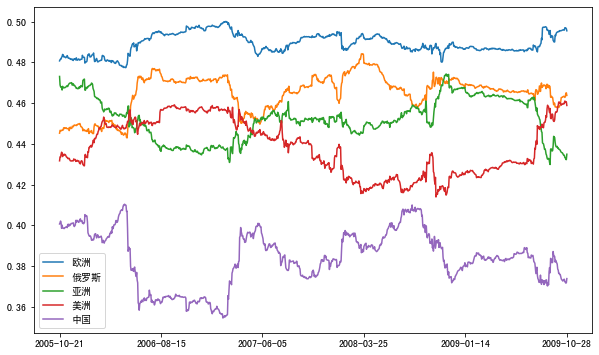

In [70]:
p_eigenvector_df.abs().plot(figsize=(10,6))

In [73]:
df = pd.DataFrame()
for i in tqdm(range(410, len(p_eigenval_df))):
    # 截取片段___________________________________
    val_df = p_eigenval_df.iloc[i-200:i]
    date_arr = val_df.index.values
    # 定位最大特征值___________________________________
    max_date = val_df.index[val_df.argmax()]
    max_val = val_df.loc[max_date]
    # 第一个特征向量___________________________________
    v_df = p_eigenvector_df.iloc[i-200:i] * np.nan
    a_matrix = np.matrix(tsn.adjacent_matrix_dict[date_arr[0]].values)
    lambda_matrix = np.matrix(np.eye(24) * max_val)
    v = np.matrix(res.loc[date]).T
    v_df.loc[date_arr[0]]  = np.array((l-a).I * v).flatten()
    print(v_df)
    break
    #res.loc[next_date]  = np.array((l-a).I * w * v).flatten()

    #df[next_date] = res.sum(axis=0)

  0%|          | 0/591 [00:00<?, ?it/s]

<AxesSubplot:>

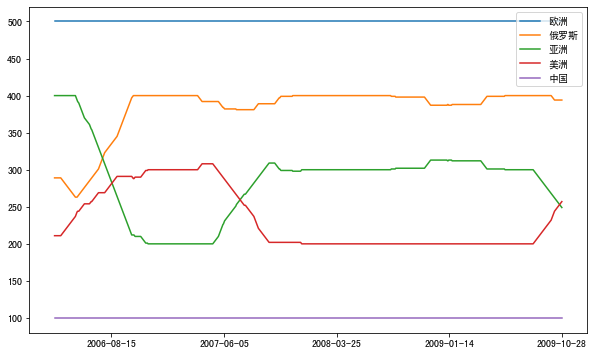

In [74]:
p_eigenvector_df.abs().rank(axis=1).rolling(window=100).sum().plot(figsize=(10,6))

In [2]:
df.T.abs().rank(axis=1).rolling(window=2).sum().plot(figsize=(10,6))

NameError: name 'df' is not defined

In [31]:
df = pd.read_csv('ARMA_p_timeseries.csv')

In [32]:
df.to_csv('gbk.csv', encoding='gbk')